In [5]:
from bs4 import BeautifulSoup
from pandas import DataFrame
import os
import json
import pandas as pd

In [9]:
def extract_data_from_report3(filename):
    html_report_part1 = open(filename,'r',encoding="utf8",errors='ignore')
    soup = BeautifulSoup( html_report_part1, "html.parser")
    return soup

In [10]:
def GetInfo(htmFile):
    dic = {"Title":"","Keywords":"","APIName":"","Description":"","Namespace":"","Guid":""}
    sup = extract_data_from_report3(htmFile)
    title = sup.title.string.split()[0]
    dic["Title"] = title
    for tag in sup.find_all("meta"):
        name = tag.get("name")
        if(name=="Description"):
            Description = tag.get("content")
            dic["Description"] = Description
        if(name=="System.Keywords"):
            Keywords = tag.get("content")
            dic["Keywords"] = Keywords
        if(name=="Microsoft.Help.F1" or name=="Microsoft.Help.Id"):
            APIName  = tag.get("content")
            sp = APIName.split(".")
            if(dic["Keywords"].endswith("property") and len(sp)>1): 
                sp[-1] = title
                sk = ".".join(sp)
                dic["APIName"] = sk
            else: dic["APIName"] = APIName
        if(name=="guid"): 
            Guid = tag.get("content")
            dic["Guid"] = Guid
        if(name=="container"):
            Namespace = tag.get("content")
            dic["Namespace"] = Namespace
    return list(dic.values())
# GetInfo(r"C:\Users\vcho\3D Objects\revitapidoc\0c10ad1b-9de1-baab-d019-99e022688a33.htm")

In [11]:
 # input folder containt all file htm extracted from file chm guide
folder = r"C:\Users\Chuong.Ho\3D Objects\RevitAPIGen\Data2023"

datas = []
def ReadFilesFolder(folder):
    files = []
    for file in os.listdir(folder):
        if file.endswith(".htm"):
            filePath = os.path.join(folder, file)
            files.append(filePath)
            try:
                metadata = GetInfo(filePath)
                datas.append(metadata)
            except Exception as e:
                print(e)
                continue
    return files
results = ReadFilesFolder(folder)
    

In [12]:

header = ["Title","Keywords","APIName","Description","Namespace","Guid"]
df = DataFrame(datas,columns=header,dtype=str)
df = df.dropna()
df.head(10)

,Title,Keywords,APIName,Description,Namespace,Guid
0,Create,,M:Autodesk.Revit.DB.Point.Create(Autodesk.Revi...,Creates a point at the given coordinates and a...,Autodesk.Revit.DB,000086a5-6616-2780-2fc8-0460ab9a3e5b
1,BoundaryRestraintRotZ,ParameterTypeId.BoundaryRestraintRotZ property,P:Autodesk.Revit.DB.ParameterTypeId.BoundaryRe...,"""Z Spring Modulus""",Autodesk.Revit.DB,0002e99b-f1c0-0480-514a-c3d9f466b9fd
2,MaxRange,ElectricalDemandFactorValue.MaxRange property,P:Autodesk.Revit.DB.Electrical.ElectricalDeman...,The maximum range for this demand factor value...,Autodesk.Revit.DB.Electrical,0003f9f7-1be6-9bcb-212a-d38767d01e10
3,ConcreteBendingReinforcement,StructuralAsset.ConcreteBendingReinforcement p...,P:Autodesk.Revit.DB.StructuralAsset.ConcreteBe...,The bending reinforcement of the asset.,Autodesk.Revit.DB,0005810b-32f5-0623-b094-c0c47fb50d32
4,StairsZeroDesiredRisers,BuiltInFailures.StairRampFailures.StairsZeroDe...,P:Autodesk.Revit.DB.BuiltInFailures.StairRampF...,The number of desired risers for a staircase c...,Autodesk.Revit.DB,00077047-bcc4-4b8f-8a52-07340ec04412
5,Kip,SymbolTypeId.Kip property,P:Autodesk.Revit.DB.SymbolTypeId.Kip,"Symbol kip, indicating unit Kips.",Autodesk.Revit.DB,00095a9c-e1f8-8edf-ff9b-dbb512951943
6,ForceVector3,AreaLoad.ForceVector3 property,P:Autodesk.Revit.DB.Structure.AreaLoad.ForceVe...,The force vector applied to the 3rd reference ...,Autodesk.Revit.DB.Structure,000a344f-d68f-8718-c6e5-72edef5ce04c
7,DocumentReloadedLatestEventArgs,"DocumentReloadedLatestEventArgs class, methods",Methods.T:Autodesk.Revit.DB.Events.DocumentRel...,,Autodesk.Revit.DB.Events,000adeb1-4940-aa8c-5e26-df3a44af1bdd
8,NPerMmSup2,SymbolTypeId.NPerMmSup2 property,P:Autodesk.Revit.DB.SymbolTypeId.NPerMmSup2,"Symbol N/mmÂ², indicating unit Newtons per squ...",Autodesk.Revit.DB,000ea288-c477-86a8-57e0-764f2e359d5b
9,RevitLink,ExternalResourceTypes.BuiltInExternalResourceT...,P:Autodesk.Revit.DB.ExternalResourceTypes.Buil...,An external resource type representing Revit L...,Autodesk.Revit.DB,0010ac27-ce75-aae5-af64-0f58a6411109


In [13]:
#add a column to indicate the type of API
df["Type"] = df["Keywords"].str.split(" ").str[-1]

In [14]:
df.head(10)

,Title,Keywords,APIName,Description,Namespace,Guid,Type
0,Create,,M:Autodesk.Revit.DB.Point.Create(Autodesk.Revi...,Creates a point at the given coordinates and a...,Autodesk.Revit.DB,000086a5-6616-2780-2fc8-0460ab9a3e5b,
1,BoundaryRestraintRotZ,ParameterTypeId.BoundaryRestraintRotZ property,P:Autodesk.Revit.DB.ParameterTypeId.BoundaryRe...,"""Z Spring Modulus""",Autodesk.Revit.DB,0002e99b-f1c0-0480-514a-c3d9f466b9fd,property
2,MaxRange,ElectricalDemandFactorValue.MaxRange property,P:Autodesk.Revit.DB.Electrical.ElectricalDeman...,The maximum range for this demand factor value...,Autodesk.Revit.DB.Electrical,0003f9f7-1be6-9bcb-212a-d38767d01e10,property
3,ConcreteBendingReinforcement,StructuralAsset.ConcreteBendingReinforcement p...,P:Autodesk.Revit.DB.StructuralAsset.ConcreteBe...,The bending reinforcement of the asset.,Autodesk.Revit.DB,0005810b-32f5-0623-b094-c0c47fb50d32,property
4,StairsZeroDesiredRisers,BuiltInFailures.StairRampFailures.StairsZeroDe...,P:Autodesk.Revit.DB.BuiltInFailures.StairRampF...,The number of desired risers for a staircase c...,Autodesk.Revit.DB,00077047-bcc4-4b8f-8a52-07340ec04412,property
5,Kip,SymbolTypeId.Kip property,P:Autodesk.Revit.DB.SymbolTypeId.Kip,"Symbol kip, indicating unit Kips.",Autodesk.Revit.DB,00095a9c-e1f8-8edf-ff9b-dbb512951943,property
6,ForceVector3,AreaLoad.ForceVector3 property,P:Autodesk.Revit.DB.Structure.AreaLoad.ForceVe...,The force vector applied to the 3rd reference ...,Autodesk.Revit.DB.Structure,000a344f-d68f-8718-c6e5-72edef5ce04c,property
7,DocumentReloadedLatestEventArgs,"DocumentReloadedLatestEventArgs class, methods",Methods.T:Autodesk.Revit.DB.Events.DocumentRel...,,Autodesk.Revit.DB.Events,000adeb1-4940-aa8c-5e26-df3a44af1bdd,methods
8,NPerMmSup2,SymbolTypeId.NPerMmSup2 property,P:Autodesk.Revit.DB.SymbolTypeId.NPerMmSup2,"Symbol N/mmÂ², indicating unit Newtons per squ...",Autodesk.Revit.DB,000ea288-c477-86a8-57e0-764f2e359d5b,property
9,RevitLink,ExternalResourceTypes.BuiltInExternalResourceT...,P:Autodesk.Revit.DB.ExternalResourceTypes.Buil...,An external resource type representing Revit L...,Autodesk.Revit.DB,0010ac27-ce75-aae5-af64-0f58a6411109,property


In [15]:
print(df.shape)
print(df.count())

(29545, 7)
Title          29545
Keywords       29545
APIName        29545
Description    29545
Namespace      29545
Guid           29545
Type           29545
dtype: int64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29545 entries, 0 to 29544
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        29545 non-null  object
 1   Keywords     29545 non-null  object
 2   APIName      29545 non-null  object
 3   Description  29545 non-null  object
 4   Namespace    29545 non-null  object
 5   Guid         29545 non-null  object
 6   Type         29545 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [4]:
df.describe()

NameError: name 'df' is not defined

In [18]:
#save dataframe to json file
df.to_json("RevitAPI2023.json",orient='records',indent=4)

In [19]:
df.to_csv("RevitAPI2023.csv",index=False, encoding='utf-8')

In [6]:
#read json to dataframe
import json
with open('RevitAPI2023.json') as f:
    data = json.load(f)
df = DataFrame(data)
df.head(10)

,Title,Keywords,APIName,Description,Namespace,Guid,Type
0,Create,,M:Autodesk.Revit.DB.Point.Create(Autodesk.Revi...,Creates a point at the given coordinates and a...,Autodesk.Revit.DB,000086a5-6616-2780-2fc8-0460ab9a3e5b,
1,BoundaryRestraintRotZ,ParameterTypeId.BoundaryRestraintRotZ property,P:Autodesk.Revit.DB.ParameterTypeId.BoundaryRe...,"""Z Spring Modulus""",Autodesk.Revit.DB,0002e99b-f1c0-0480-514a-c3d9f466b9fd,property
2,MaxRange,ElectricalDemandFactorValue.MaxRange property,P:Autodesk.Revit.DB.Electrical.ElectricalDeman...,The maximum range for this demand factor value...,Autodesk.Revit.DB.Electrical,0003f9f7-1be6-9bcb-212a-d38767d01e10,property
3,ConcreteBendingReinforcement,StructuralAsset.ConcreteBendingReinforcement p...,P:Autodesk.Revit.DB.StructuralAsset.ConcreteBe...,The bending reinforcement of the asset.,Autodesk.Revit.DB,0005810b-32f5-0623-b094-c0c47fb50d32,property
4,StairsZeroDesiredRisers,BuiltInFailures.StairRampFailures.StairsZeroDe...,P:Autodesk.Revit.DB.BuiltInFailures.StairRampF...,The number of desired risers for a staircase c...,Autodesk.Revit.DB,00077047-bcc4-4b8f-8a52-07340ec04412,property
5,Kip,SymbolTypeId.Kip property,P:Autodesk.Revit.DB.SymbolTypeId.Kip,"Symbol kip, indicating unit Kips.",Autodesk.Revit.DB,00095a9c-e1f8-8edf-ff9b-dbb512951943,property
6,ForceVector3,AreaLoad.ForceVector3 property,P:Autodesk.Revit.DB.Structure.AreaLoad.ForceVe...,The force vector applied to the 3rd reference ...,Autodesk.Revit.DB.Structure,000a344f-d68f-8718-c6e5-72edef5ce04c,property
7,DocumentReloadedLatestEventArgs,"DocumentReloadedLatestEventArgs class, methods",Methods.T:Autodesk.Revit.DB.Events.DocumentRel...,,Autodesk.Revit.DB.Events,000adeb1-4940-aa8c-5e26-df3a44af1bdd,methods
8,NPerMmSup2,SymbolTypeId.NPerMmSup2 property,P:Autodesk.Revit.DB.SymbolTypeId.NPerMmSup2,"Symbol N/mmÂ², indicating unit Newtons per squ...",Autodesk.Revit.DB,000ea288-c477-86a8-57e0-764f2e359d5b,property
9,RevitLink,ExternalResourceTypes.BuiltInExternalResourceT...,P:Autodesk.Revit.DB.ExternalResourceTypes.Buil...,An external resource type representing Revit L...,Autodesk.Revit.DB,0010ac27-ce75-aae5-af64-0f58a6411109,property


In [7]:
# read csvs to dataframe
df = pd.read_csv("RevitAPI2023.csv")
df.head(10)

,Title,Keywords,APIName,Description,Namespace,Guid,Type
0,Create,NaN,M:Autodesk.Revit.DB.Point.Create(Autodesk.Revi...,Creates a point at the given coordinates and a...,Autodesk.Revit.DB,000086a5-6616-2780-2fc8-0460ab9a3e5b,NaN
1,BoundaryRestraintRotZ,ParameterTypeId.BoundaryRestraintRotZ property,P:Autodesk.Revit.DB.ParameterTypeId.BoundaryRe...,"""Z Spring Modulus""",Autodesk.Revit.DB,0002e99b-f1c0-0480-514a-c3d9f466b9fd,property
2,MaxRange,ElectricalDemandFactorValue.MaxRange property,P:Autodesk.Revit.DB.Electrical.ElectricalDeman...,The maximum range for this demand factor value...,Autodesk.Revit.DB.Electrical,0003f9f7-1be6-9bcb-212a-d38767d01e10,property
3,ConcreteBendingReinforcement,StructuralAsset.ConcreteBendingReinforcement p...,P:Autodesk.Revit.DB.StructuralAsset.ConcreteBe...,The bending reinforcement of the asset.,Autodesk.Revit.DB,0005810b-32f5-0623-b094-c0c47fb50d32,property
4,StairsZeroDesiredRisers,BuiltInFailures.StairRampFailures.StairsZeroDe...,P:Autodesk.Revit.DB.BuiltInFailures.StairRampF...,The number of desired risers for a staircase c...,Autodesk.Revit.DB,00077047-bcc4-4b8f-8a52-07340ec04412,property
5,Kip,SymbolTypeId.Kip property,P:Autodesk.Revit.DB.SymbolTypeId.Kip,"Symbol kip, indicating unit Kips.",Autodesk.Revit.DB,00095a9c-e1f8-8edf-ff9b-dbb512951943,property
6,ForceVector3,AreaLoad.ForceVector3 property,P:Autodesk.Revit.DB.Structure.AreaLoad.ForceVe...,The force vector applied to the 3rd reference ...,Autodesk.Revit.DB.Structure,000a344f-d68f-8718-c6e5-72edef5ce04c,property
7,DocumentReloadedLatestEventArgs,"DocumentReloadedLatestEventArgs class, methods",Methods.T:Autodesk.Revit.DB.Events.DocumentRel...,NaN,Autodesk.Revit.DB.Events,000adeb1-4940-aa8c-5e26-df3a44af1bdd,methods
8,NPerMmSup2,SymbolTypeId.NPerMmSup2 property,P:Autodesk.Revit.DB.SymbolTypeId.NPerMmSup2,"Symbol N/mmÂ², indicating unit Newtons per squ...",Autodesk.Revit.DB,000ea288-c477-86a8-57e0-764f2e359d5b,property
9,RevitLink,ExternalResourceTypes.BuiltInExternalResourceT...,P:Autodesk.Revit.DB.ExternalResourceTypes.Buil...,An external resource type representing Revit L...,Autodesk.Revit.DB,0010ac27-ce75-aae5-af64-0f58a6411109,property


#### Check see how many Type use and value count

In [11]:
sr = df["Type"].value_counts()
type(sr)

pandas.core.series.Series

TypeError: float() argument must be a string or a number, not 'method'

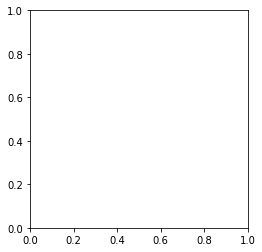

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
#define data
data = df
labels = df.columns

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data.value_counts, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()